# Clustering

## KMeans review



Review the notes from [Monday](2021-11-01), including the gifs at the bottom for more illustration of what kmeans does under the hood. Ask any open questions on Prismia



## Clustering with Sci-kit Learn

Read through this notebook and answer questions either by adding code or typing in markdown cells.  
For hints about code, switch the markdown cells with the prompt to edit mode.  There are hints in them stored as html(markdown) comments.

In [1]:
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
sns.set_theme(palette='colorblind')

# set global random seed so that the notes are the same each time the site builds
np.random.seed(1103)

Load the iris data from seaborn

In [2]:
iris_df = sns.load_dataset('iris')

Create a grid of scatterplots of the data, without coloring the points differently

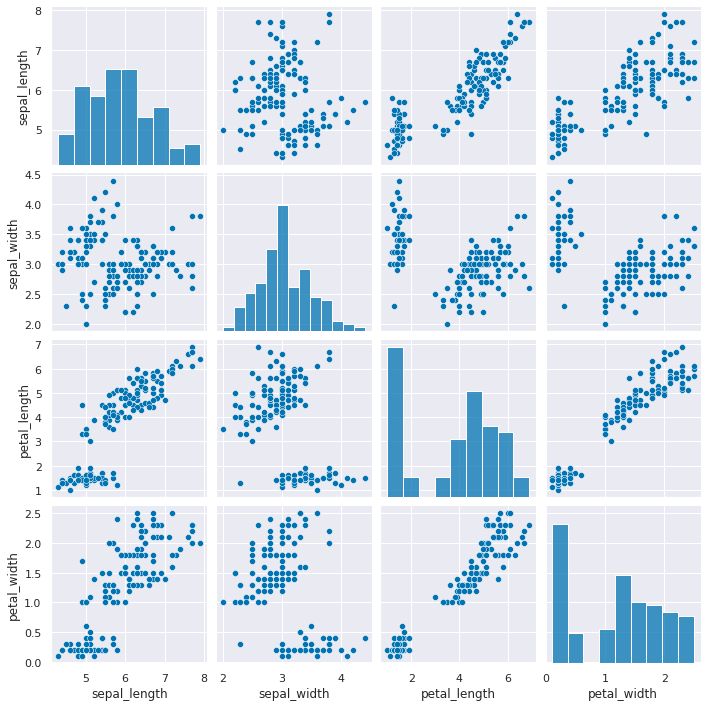

In [3]:
sns.pairplot(iris_df)

Create a copy of the data that's appropriate for clustering. Remember that clustering is *unsupervised* so it doesn't have a target variable. We also can do clustering on the data with or without splitting into test/train splits, since it doesn't use a target variable, we can evaluate how good the clusters it finds are on the actual data that it learned from.

```{hint}
We can either pick the measurements out or drop the species column.
remember most data frame operations return a copy of the dataframe.
```

We'll do this by picking out the measurement columns, but we could also drop the species for now.

In [4]:
measurement_cols = ['sepal_length','petal_length','sepal_width','petal_width']
iris_X = iris_df[measurement_cols]
# iris_X =iris_df.drop(columns=['species']) # equivalent to above


Create a Kmeans estimator object with 3 clusters, since we know that the iris data has 3 species of flowers. We refer to these three groups as classes in classification (the goal is to label the classes...) and in clustering we typically borrow that word.  Sometimes, clustering literature will be more abstract and refer to partitions, this is especially common in more mathematical/statistical work as opposed to algorithmic work on clustering.

```{admonition} Question
How do we know there are three classes? didnt' we just drop them?

```

We dropped the *column* that tells us which of the three classes that each sample(row) belongs to.  We still have data from three species of flows.

```{hint}
use shift+tab or another jupyter help to figure out what the parameter names are for any function or class you're working with.
```

In [5]:
km = KMeans(n_clusters=3)

Since we don't have separate test and train data, we can use the `fit_predict` method.  This is what the kmeans algorithm always does anyway, it both learns the means and the assignment (or prediction) for each sample at the same time.  On Monday, that would be the last column of the dataframe, the one in the highest.

Use the `fit_predict` method and look at what it outputs.

In [6]:
km.fit_predict(iris_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

This gives the labeled cluster by index, or the assignment, of each point.

These are similar to the outputs in classification, except that in classification, it's able to tell us a specific species for each. Here it can only say clust 0, 1, or 2.  It can't match those groups to the species of flower.

Now that we know what these are, we can save them to a variable.

In [7]:
cluster_assignments = km.fit_predict(iris_X)

Use the `get_params` method to look at the parameters.  Read the documentation to see what they mean.

In [8]:
km.get_params(deep=True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Visualizing the outputs

Add the predictions as a new column to the original `iris_df` and make a `pairplot` with the points colored by what the clustering learned.

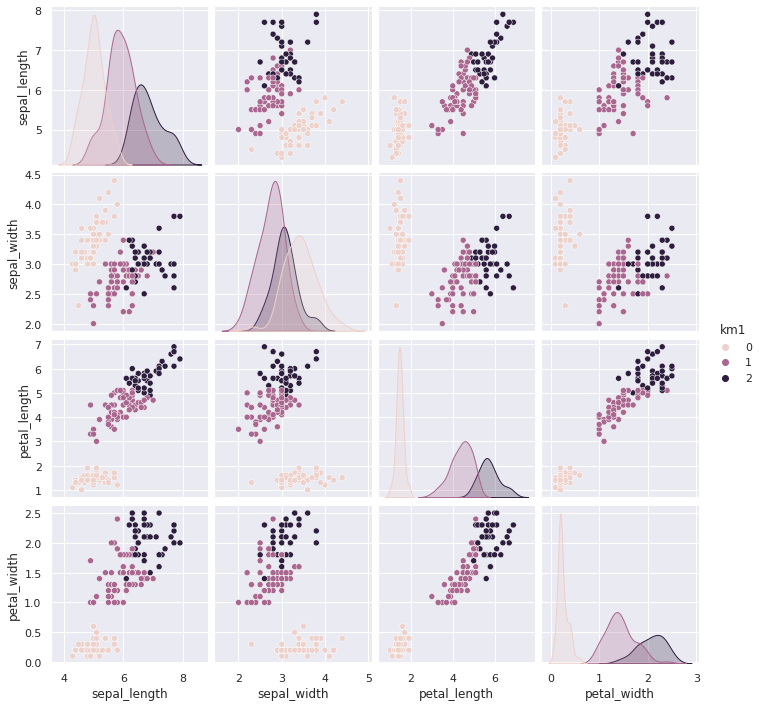

In [9]:
iris_df['km1'] = cluster_assignments
sns.pairplot(data=iris_df, hue='km1')

We can use the `vars` parameter to plot only the measurement columns and not the cluster labels.  We didn't have to do this before, because `species` is strings, but the cluster predictions are also numerical, so by default seaborn plots them.

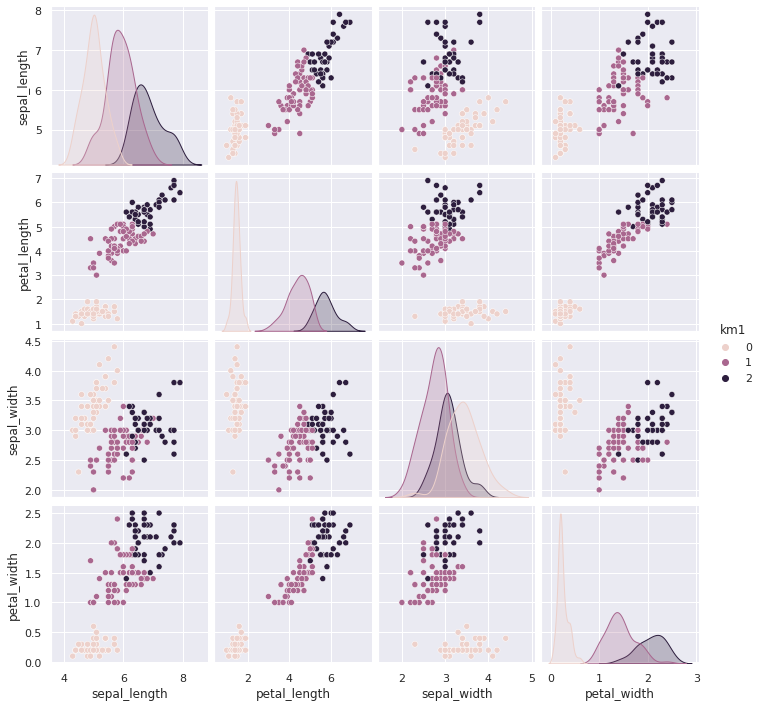

In [10]:
iris_df['km1'] = cluster_assignments
sns.pairplot(data=iris_df, hue='km1', vars=measurement_cols)

## Clustering Persistence

We can run kmeans a few more times and plot each time and/or compare with a neighbor/ another group.

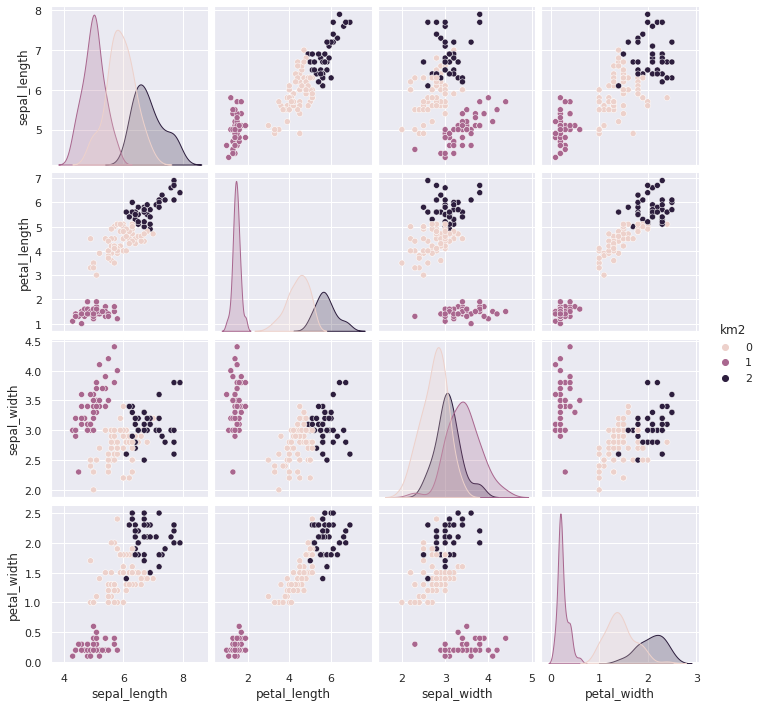

In [11]:
iris_df['km2'] = km.fit_predict(iris_X)
sns.pairplot(data=iris_df, hue='km2', vars=measurement_cols)

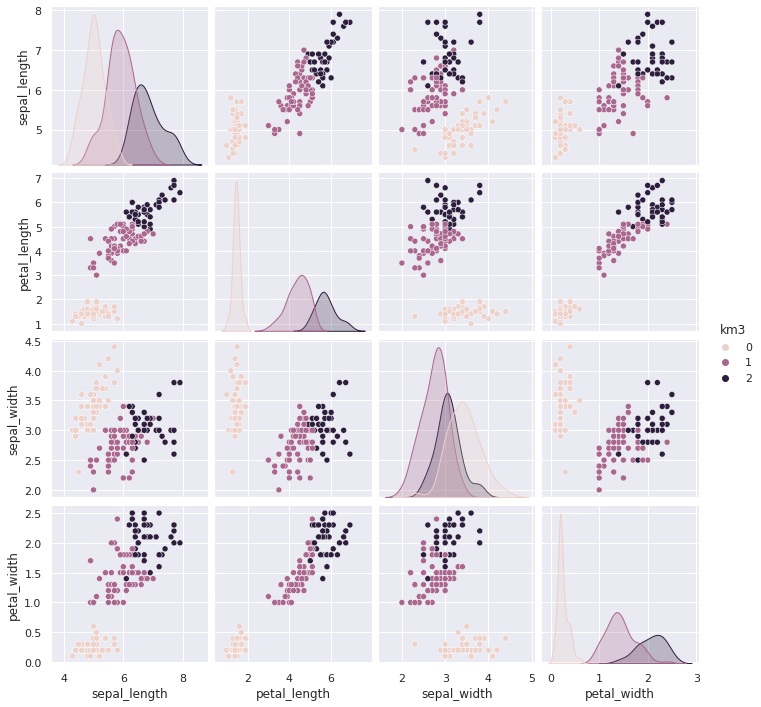

In [12]:
iris_df['km3'] = km.fit_predict(iris_X)
sns.pairplot(data=iris_df, hue='km3', vars=measurement_cols)

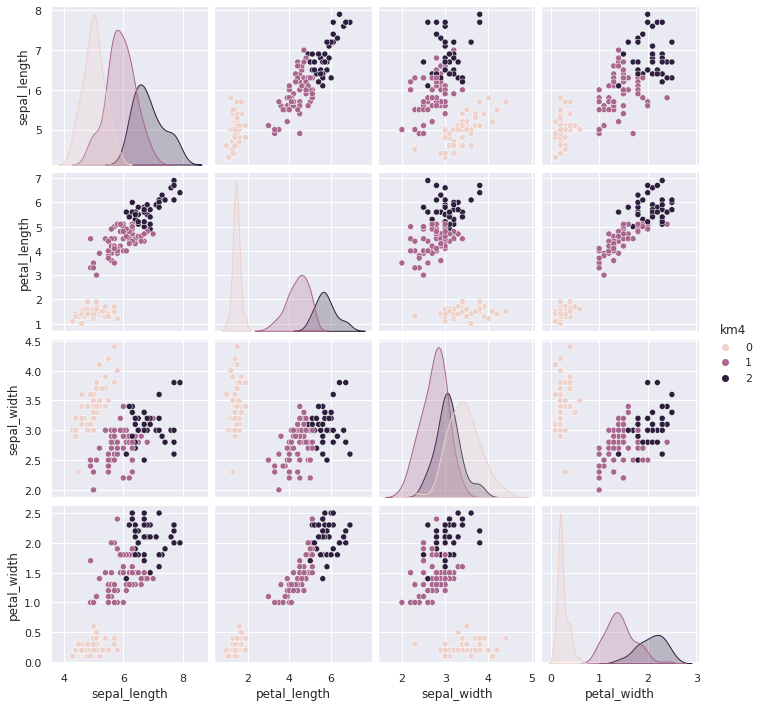

In [13]:
iris_df['km4'] = km.fit_predict(iris_X)
sns.pairplot(data=iris_df, hue='km4', vars=measurement_cols)

We could also use a loop (or list comprehension) to repeat kmeans multiple
times.
````{margin}
```{tip}
using the i as a loop variable here makes sense since we're actually just repeating for the sake of repeating
```
````

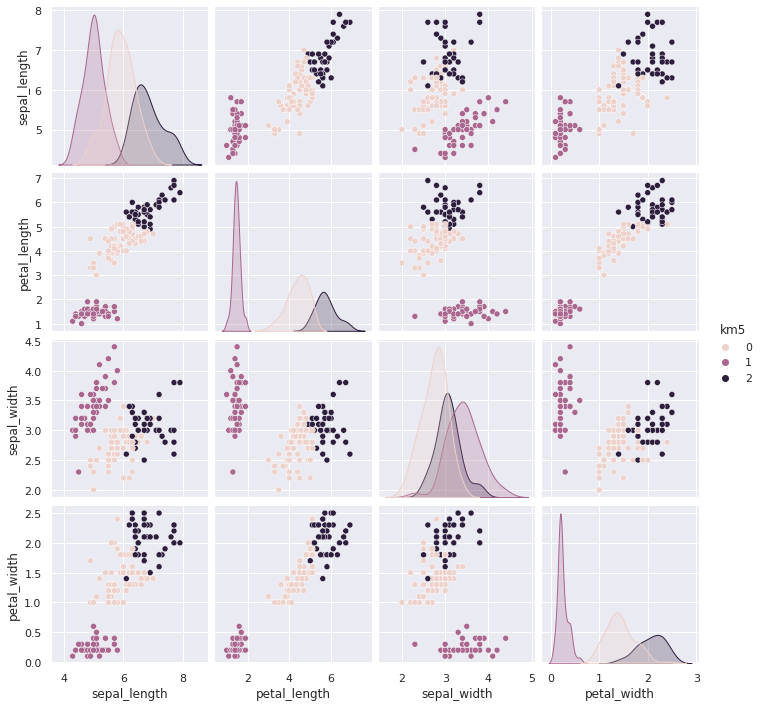

In [14]:
for i in [5,6,7]:
  iris_df['km' + str(i)] = km.fit_predict(iris_X)

sns.pairplot(data=iris_df, hue='km5', vars=measurement_cols)

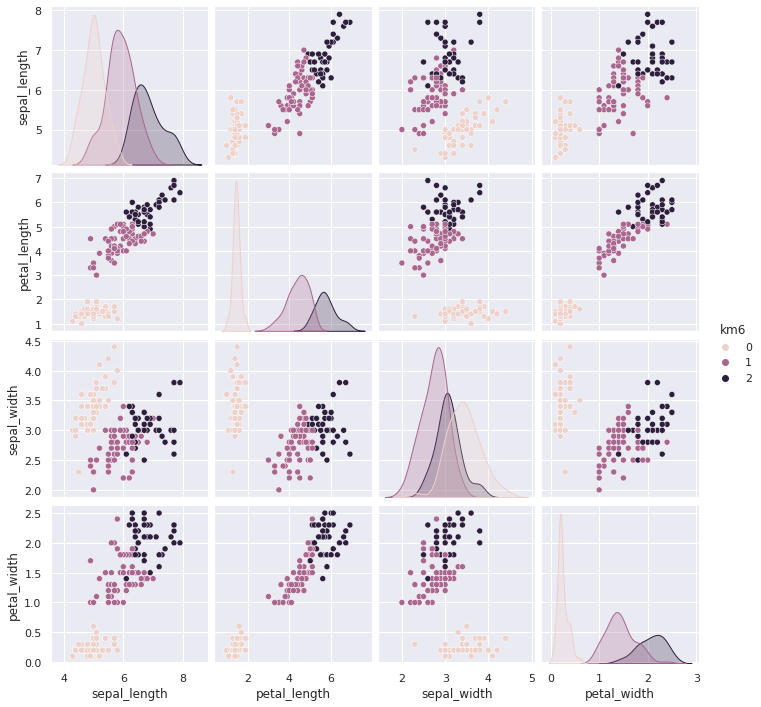

In [15]:
sns.pairplot(data=iris_df, hue='km6', vars=measurement_cols)

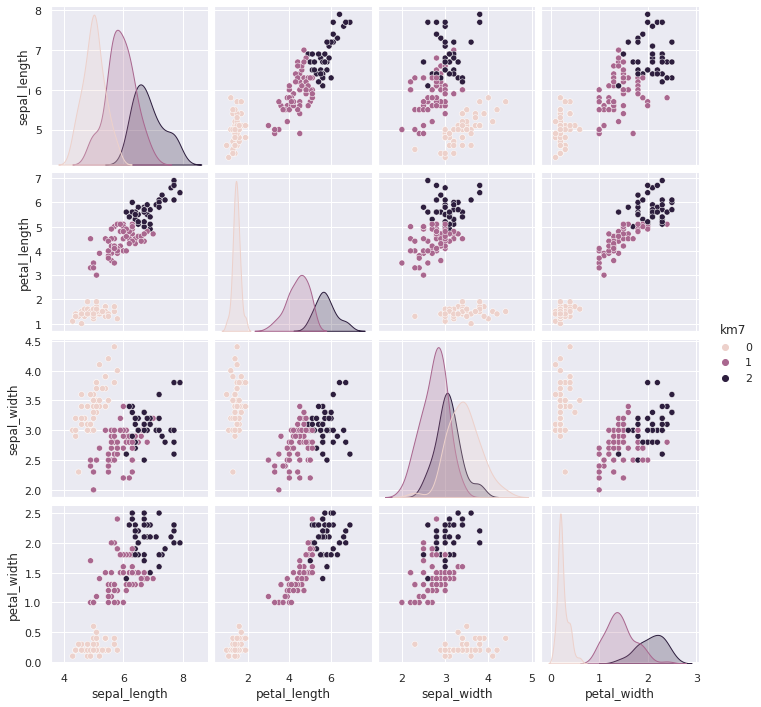

In [16]:
sns.pairplot(data=iris_df, hue='km7', vars=measurement_cols)

The *grouping* of the points stay the same across different runs, but which color each group gets assigned to changes. Look at the 5th time compared to the ones before and 6 compared to that. Which blob is which color changes. 


Today, we saw that the clustering solution was pretty similar each time in terms of which points were grouped together, but the labeling of the groups (which one was each number) was different each time.  We also saw that clustering can only number the clusters, it can't match them with certainty to the species. This makes evaluating clustering somewhat different, so we need new metrics.

What might be our goal for evaluating clustering? We'll start from evaluating clustering on Friday.  


## Questions Before and After Class

### How can I do linear regression with multiple features
```{toggle}
We did that once, with the diabetes dataset, but basically its the same as how above we pick out the measurment columns as the X for clustering.  
```


### How can we do multiple iterations of KMeans easily?
```{toggle}
I did it two ways above, but we'll also see more ways to run different iteractions of models next week, when we learn optimizing models.  I wanted to cover a few different types before we optimize though, so that you can practice optimizing with any type you're most interested in.
```

### If my results do not form good distinct clusters what does it mean?
```{toggle}
This could be that the data is not very separable, or it could be that the dimensions that you're looking at are not the best directions to separate the clusters or it could be the wrong number of clusters.  

it's important to consider that it could be a visual artifact of 2d screens and high dimensional data.  We'll see scores that can help us check to differentiate.
```

### Are there more ways to tell how accurate the model is
```{toggle}
Yes! We'll talk about them Friday. If you want to get a head start, see the [clustering evaluation] section of the scikit learn documentation.
```